# Assignment 5
## Contents of the Machine Learning II Lecture 
## Summer Semester 2020


## Correlations:

### Correlation vs. Causality
When working with data, often times correlation or causality can be observed. As being able to tell them apart and understanding why one might not imply the other is very important, this theory recap starts with going over the definition of both. A closer look at different types of correlations will follow later.

### Causality
Definition: 

Causality can be defined as the generalised observation of an event A causing an event B, so that B only happens when A happened beforehand. ( A ---> B )

Example:

Walking outside after rainfall you might observe that the street is wet. You might hence assume that rain is the cause for why streets would be wet.
( rain ---> wet street ).

### Correlation
Definition:

Correlation can be defined as the observation that an event A and an event B are happening together. Here, when A happens you will find that B happens as well.

Example:

Just like above you are outside and find the street to be wet. This time however you notice that no rainfall has happened. As you begin to wonder whether rainfall really is the only cause for streets to be wet, you meet your neighbour as he is finishing up watering his frontyard plants with a water hose. You realise that rainfall is not the only cause for your observation and that it simply correlates with the street being wet.

### Correlation in data
Taking correlation to data, we'll compare two variables and inspect their movements compared to the other one. Remember that correlation means the two should show some sort of behaviour together. We generally distinguish three kinds of correlations.

1. Positive correlation

    Both variables will change in the same direction. As A goes up, B will go up. As A goes down, B will go down.

2. Negative correlation

    When one of the two goes up, the other will go down by some proportion and vice versa.

3. No correlation
    
    Changes of one variable are not reflected by the other.

The closer the proportional movement of one of the variables matches the other, the closer related they are.

Let's now review correlation using Python and some visuals.



In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive correlation with some noise
y = x + np.random.normal(0, 10, 1000)

print(np.corrcoef(x, y))

[[1.         0.82608475]
 [0.82608475 1.        ]]


In the above we see a strong correlation of ~ 0.8. We can easily visualise this in a plot.

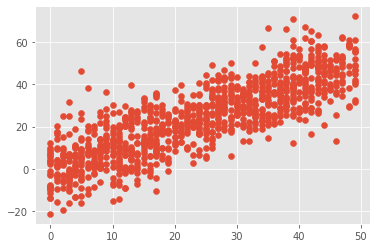

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()

What can be derived from this plot is that as x becomes bigger, so does y. This is what positive correlation looks like with some noise outside the corridor of data points.

Let's add a negative correlation as a variable and look at the plot again.

[[ 1.         -0.94374528]
 [-0.94374528  1.        ]]


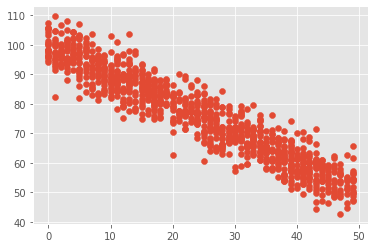

In [3]:
# Negative correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

print(np.corrcoef(x, y))

plt.scatter(x, y)
plt.show()

With a strongly negative correlation of ~ -0.9 we can see in the graph, as x becomes larger, y decreases. Compared to the scatter above, the dots are closer to each other due to stronger correlation.

With a correlation value of -1, the graph would be a straight dotted line.

Last but not least there is scenario 3 to look at: variables without correlation.

[[ 1.        -0.0326305]
 [-0.0326305  1.       ]]


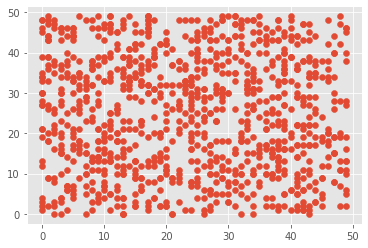

In [4]:
# 1000 random integers between 0 and 50
y = np.random.randint(0, 50, 1000)

print(np.corrcoef(x, y))

plt.scatter(x, y)
plt.show()

The very marginal correlation of ~ -0.01 results in a plot with points scattered all over it.

By using the pandas library, we can also show correlations between values in a correlation matrix.

In [5]:
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

print(df.corr())

          a         b         c         d
a  1.000000  0.841742 -0.945925  0.012925
b  0.841742  1.000000 -0.785743 -0.000373
c -0.945925 -0.785743  1.000000 -0.016394
d  0.012925 -0.000373 -0.016394  1.000000


And look at these correlations graphically, too.

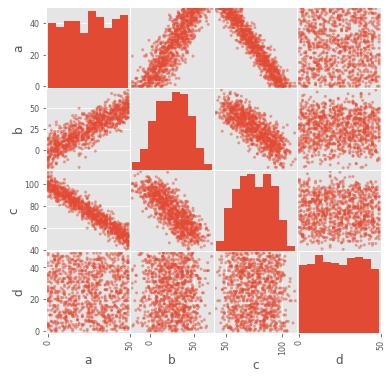

In [6]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

Alternatively, a correlation matrix plot is also available.

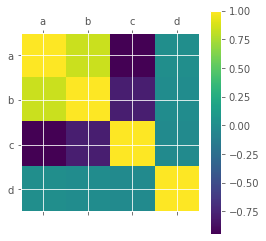

In [7]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

Attribution: Code taken (but modified) from https://benalexkeen.com/correlation-in-python/

## Linear and non-linear correlations:

### Pearson’s Correlation Coefficient 

**Short Summary:** The covariance of the two variables (or vectors) divided by the product of their standard deviations.


#### Background on Covariance

The covariance between two vectors measures their tendencies to vary above or below their respective means together. Or, in other words, whether there is a tendency for their pair to be on the same or opposing sites of their means.

As a formula, the covariance of two random variables $X$ and $Y$ looks like this:

$Cov(X,Y)=\sum(X-E[X])(Y-E[Y])$

When applied to a sample however, the formula changes slightly to take into account the sample size $N$ and also calculates based on the $i$th element in both $x$ and $y$. The formula then turns into:

$Cov(x,y)=\frac{\sum_{i}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N}$


Let's have a look how the latter version can be implemented in Python.

In [8]:
a = [1,2,3,4,5] ; b = [5,4,3,2,1]

def mean(x):
    return sum(x)/len(x)

def covariance(x,y):
    calc = []
  
    for i in range(len(x)):
        xi = x[i] - mean(x)
        yi = y[i] - mean(y)
        calc.append(xi * yi)
    return sum(calc)/(len(calc))
    
print(covariance(a,b))

-2.0


The above implementation follows the same steps taken if we were to calculate $Cov(a,b)$ manually, so it is worth stepping through this again.

**First step:** for each pair of $x_{i}$ and $y_{i}$, their respective mean is substracted from them and the resulting two values are multiplies.

In terms of movement of $x$ and $y$ compared to their mean, the following two possible outcomes can be observed:

1. If both $x_{i}$ and $y_{i}$ are above or below their mean (same side), their multiplication will yield a positive number. This is due to multiplication rules of $positive * positive = positive$ and $negative * negative = positive$  
2. If $x_{i}$ and $y_{i}$ are on opposing sides of their own mean, their multiplication will yield a negative number, because $positive * negative = negative$

We can use this to understand the following about the covariance of $x$ and $y$:

- If the pairs tend to be on the same side of their means, the covariance will be a positive number
- If the pairs tend to be on the other sides of their means, the covariance will be a negative number
- If there is no overall pattern, the covariance will be close to zero as positive and negative multiplication results will cancel out.

The stronger these tendencies are, the bigger the absolute value of the covariance will be.

**Second step:** to complete the calculation of the *sample covariance*, the calculated values of each pair need to be summed up and divided by $n$, where $n$ is the sample size.

#### Shortcomings of Covariance

The above might lead to the conclusion of **high covariance == high absolute value**

What this fails to account for however is the scale dependency of covariance. So when the relationship in $x$ and $y$'s movement is observed, their covariance will reflect their scale: if both vectors contain only values below $1$, their maximum covariance will also be equal to $+/- 1$. If both $x$ and $y$ however contain values below $100$, the maximum of their covariance will be $+/- 100$

#### Pearson's r

Pearson's correlation coefficient solves the scale dependency issue of covariance by normalising it over the product of both standard deviations of $x$ and $y$. The formula looks like this:

$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$

This is done because the standard deviation of a vector is the square root of its variance.
So if two vectors are identical, the multiplication of their standard deviations will give their variance.

It should also be added that the convariance of two identical vectors also equals their variance.

Combining these two relationships results in:
1. The maximum covariance between two vectors equals the product of their standard deviations
2. Maximum covariance occours when both vectors are prefectly correlated
3. Normalising by the product of both standard deviations enforces a boundrary of $+/- 1$ for the Person correlation value

A sample implementation of Person's r in Python looks like this:



In [9]:
import math

def stDev(x):
    variance = sum([((z - mean(x)) ** 2) for z in x]) / len(x) 
    return math.sqrt(variance)
    
def Pearsons(x,y):
    cov = covariance(x,y)
    return cov / (stDev(x) * stDev(y))

print(Pearsons(a, b))

-0.9999999999999998


### Spearman’s Rank Correlation

**Short Summary:** A nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). The Spearman correlation between two variables is equal to the Pearson correlation between the ranked values of those two variables; while Pearson’s correlation assesses linear relationships, Spearman’s correlation assesses monotonic relationships (whether linear or not).

Attribution: 

https://easystats.github.io/correlation/articles/types.html

https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/

# Dimensionality Reduction, Standardization and Regularization

## Eigenvectors and Eigenvalue

Let A be an n x n matrix. A scalar $\lambda$ is an *eigenvalue* of the n x n matrix A if and only if the matrix A - $\lambda$ I is singular, i.e., of rank < *n*. The corresponding eigenvectors are the nonzero solutions to the eigenvalue equation (A-$\lambda$I)v = 0.

Av = $\lambda$ v

The requirement that the eigenvector v is nonzero is important, since v = 0 is a trivial solution to the eigenvalue equation for every scalar $\lambda$.
Also: a scalar $\lambda$ is an eigenvalue of the matrix A if and only if $\lambda$ is a solution to the characteristic equation det(A-$\lambda$I) = 0.

## Eigenvalue Decomposition

For any $n\times n$ square matrix ${\bf A}$, if there exist a vector ${\bf v}$ and a scalar $\lambda$ such that the following eigenequation holds:

  $\displaystyle {\bf Av}=\lambda {\bf v},
$
then $\lambda$ and ${\bf v}$ are called the eigenvalue and eigenvector of matrix ${\bf A}$, respectively. In other words, the linear transformation of vector ${\bf v}$ by ${\bf A}$ has the same effect of scaling the vector by factor $\lambda$. (Note that for an $m\times n$ non-square matrix ${\bf A}$ with $m\ne n$, ${\bf Av}$ is an m-D vector but $\lambda{\bf v}$ is n-D vector, i.e., no eigenvalues and eigenvectors are defined.)
Given ${\bf Av}=\lambda{\bf v}$, we also have ${\bf A}c{\bf v}=\lambda c{\bf v}$ for any scalar constant $c$, i.e., the eigenvector ${\bf v}$ is not unique but up to any scaling factor. For the uniqueness of ${\bf v}$, we typically keep it normalized so that $\vert\vert{\bf v}\vert\vert=1$.

To obtain $\lambda$, we rewrite the above equation as

  $\displaystyle (\lambda {\bf I}-{\bf A}) {\bf v} ={\bf0}
$
For this homogeneous equation system to have non-zero solutions for ${\bf v}$, the determinant of its coefficient matrix has to be zero:
  $\displaystyle det(\lambda {\bf I}-{\bf A})=\vert \lambda {\bf I}-{\bf A} \vert = 0
$

An eigendecomposition is calculated on a square matrix using an efficient iterative algorithm, of which we will not go into the details.

Often an eigenvalue is found first, then an eigenvector is found to solve the equation as a set of coefficients.

The eigendecomposition can be calculated in NumPy using the eig() function.

The example below first defines a 3×3 square matrix. The eigendecomposition is calculated on the matrix returning the eigenvalues and eigenvectors.

In [10]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [11]:
# calculate eigendecomposition
values, vectors = eig(A)
print(values)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]


In [12]:
print(vectors)

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


We can confirm that a vector is indeed an eigenvector of a matrix.

We do this by multiplying the candidate eigenvector by the eigenvector and comparing the result with the eigenvalue.

First, we will define a matrix, then calculate the eigenvalues and eigenvectors. We will then test whether the first vector and value are in fact an eigenvalue and eigenvector for the matrix. We know they are, but it is a good exercise.

The eigenvectors are returned as a matrix with the same dimensions as the parent matrix, where each column is an eigenvector, e.g. the first eigenvector is vectors[:, 0]. Eigenvalues are returned as a list, where value indices in the returned array are paired with eigenvectors by column index, e.g. the first eigenvalue at values[0] is paired with the first eigenvector at vectors[:, 0].

In [13]:
# confirm eigenvector
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# calculate eigendecomposition
values, vectors = eig(A)
# confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)

[ -3.73863537  -8.46653421 -13.19443305]


In [14]:
C = vectors[:, 0] * values[0]
print(C)

[ -3.73863537  -8.46653421 -13.19443305]


The example multiplies the original matrix with the first eigenvector and compares it to the first eigenvector multiplied by the first eigenvalue.

Running the example prints the results of these two multiplications that show the same resulting vector, as we would expect.

## PCA

Principle Component Analysis (PCA) is a very popular dimensionality reduction algorithm. It first identifies the hyperplane that lies closest to the data and then projects the data onto it. For this is first identifies the axis that accounts for the largest amount of variance in the training set. It then finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. The unit vector that defines the i$^n$ axis is called the i$^n$ principle component (PC). The PC's can be found using a matrix factorization technique called Singular Value Decomposition (SVD) that decomposes the training set matrix X into the matrix multiplication of three matrices U $\sum$ V$^T$, where V contains all the PC's that we are looking for.

In [15]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [16]:
print(pca.singular_values_)

[6.30061232 0.54980396]


## Stochastic Neighbor Embedding

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [17]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# fit X into an embedded space and return that transformed output
# n_components = 2 (dimensions of the embedded space)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

## Isomap Embedding

Isomap (Isometric Feature Mapping), unlike Principle Component Analysis, is a non-linear feature reduction method. Isomap should be used when there is a non-linear mapping between your higher-dimensional data and your lower-dimensional manifold (e.g. data on a sphere). Isomap is better than linear methods when dealing with almost all types of real image and motion tracking.

In [18]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [19]:
# n_components = 2 (which is the number of coordinated for the manifold)
embedding = Isomap(n_components=2)
# fit the model from data in X and transform X
X_transformed = embedding.fit_transform(X[:100])
# check transformed shape
X_transformed.shape

(100, 2)

## Standardization

Feature scaling is a very important part of making machine learning algorithms work. ML algorithms usually don't work well if the input has unscaled numerical inputs.

Standardization first subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐
ever, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected.

In [20]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [21]:
print(scaler.mean_)

[0.5 0.5]


In [22]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [23]:
print(scaler.transform([[2, 2]]))

[[3. 3.]]


## Min-Max Scaling

For Min-Max scaling values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐ ing the min value and dividing by the max minus the min.

In [24]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [25]:
print(scaler.data_max_)

[ 1. 18.]


In [26]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [27]:
print(scaler.transform([[2, 2]]))

[[1.5 0. ]]


## Regularization (Ridge & Lasso)

A good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For example, a simple way to regularize a polynomial model
is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression and Lasso Regression.

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to α∑i = 1
n
θi
2
is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

Note that the bias term θ0
 is not regularized (the sum starts at i = 1, not 0). If we
define w as the vector of feature weights (θ1
 to θn
), then the regularization term is
simply equal to ½(∥ w ∥2
)
2
, where ∥ w ∥2
 represents the ℓ2 norm of the weight vector. As with Linear Regression, we can perform Ridge Regression either by computing a
closed-form equation or by performing Gradient Descent.
 



In [28]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
# create example features and target
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
# fit model with high alpha
clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
print(clf.coef_)

[ 0.51088991  0.03729032 -0.65075201  0.0930311   0.93380887]


In [30]:
# and low alpha:
clf = Ridge(alpha=.2)
clf.fit(X, y)
print(clf.coef_)

[ 1.1961396  -0.09574812 -0.96234511  0.06421247  1.66880754]


Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm. An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).  In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

In [31]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)

[0.85 0.  ]


In [32]:
print(clf.intercept_)

0.15000000000000002


## Elastic Net

Elastic net is a linear regression with combined L1 and L2 priors as regularizer. Controlling the L1 and L2 penalty separately, this is equivalent to: a * L1 + b * L2 where alpha = a + b and l1_ratio = a / (a + b)

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [34]:
X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(random_state=0)
print(regr.coef_)

[18.83816048 64.55968825]


In [35]:
print(regr.intercept_)

1.4512607561654032


In [36]:
print(regr.predict([[0, 0]]))

[1.45126076]


## Cluster Algorithms

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# loading the data
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
def normalization(X):
    '''
    This function takes dataframe values to be normalized and normalizes it within the range 0 and 1

    '''
    X_ori = X    # For storing to normalise
    X = (X_ori-X_ori.min())/(X_ori.max()-X_ori.min())   # Normalised values
    return X

from sklearn.preprocessing import StandardScaler as std
# Normalised the continous variables and one hot encoded the categorical variables
# For standardization
X = df
scaler=std()
X = scaler.fit_transform(X)
#X = np.hstack((X,df['OH_0'].values.reshape(-1,1)))
# For normalization
# df = normalization(X).join(df['OH_0'])

#### Clustering 

#Clustering is done here with the help of following set of algorithms:
#  - KMeans
#  - Agglomerative clustering
#     - Hierarchial clustering
#     - DB scan clustering


# The following library has all the validation tests and algorithms to perform clustering

from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import collections

class clustering:
    """
    This class has all the tests of clustering criterion to find the optimal number of clusters
    and all the clustering methods to do clustering

    Clustering methods dicussed over here are:

    1.  Agglomerative clustering
         1.1) Hierarchial clustering
         1.2) DB scan clustering

    2.  K-means clustering

    """

    def __init__(self, X):
        self.X = X

    def cluster_plot(self):
        """
        Cluster plotting for different cluster algorithms
        """
        fig = plt.figure(figsize=(10,8))
        sns.set_palette(sns.color_palette("cubehelix", 8))
        ax = Axes3D(fig)
        ax.scatter(self.X[:,0].tolist(),self.X[:,1].tolist(),self.X[:,2].tolist(),c=self.labels,marker='v')
        ax.legend()
        plt.show()

    def dendogram(self):
        """
        This method plots dendogram for hierarchial clustering
        """
      
        plt.figure(figsize=(20, 7))
        dendrogram = sch.dendrogram(sch.linkage(self.X, method='ward'))
        plt.title("Dendograms")
        plt.axhline(linestyle='--', y=5) 
        plt.show()
  
    def silhouette_scores(self):
        """
        This method plots silhouette_scores for k-means clustering to find optimal number of clusters

        """
        kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
        silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:]]
        print("The maximum silhouette score is %0.02f at the cluster number %d\n" % (np.max(silhouette_scores),(silhouette_scores.index(np.max(silhouette_scores))+2)))
        plt.figure(figsize=(16, 8))
        plt.plot(range(2, 10), silhouette_scores, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        plt.show()


    def davies_bouldin_score(self):
     
        """
        Validation test to check score after clustering

        """
        print("The davies bouldin score of the clustering is %0.002f\n" % (davies_bouldin_score(self.X, self.labels)))
        print("The points in each cluster are : ")
        print(collections.Counter(self.labels))


    def kmeans_clustering(self,k):

        """
        Performs k-means algorithm with given clusters'k'

        Input  : The input to this algorithm is clusters
        Output : Output is clustering labels
        """
        print("***Performing K-means clustering with %d clusters***\n"%k)
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=100, n_jobs=-1).fit(X)
        self.labels = kmeans.labels_
        self.davies_bouldin_score()
        print("The k-means inertia is %0.002f\n" %(kmeans.inertia_))
        self.cluster_plot()
        return self.labels , kmeans.cluster_centers_


    def hierarchial_clustering(self,k):

        """
        Performs hierarchial clustering with given clusters'k'

        Input  : The input to this algorithm are clusters
        Output : Output is clustering labels
        """
        print("***Performing hierarchial clustering***\n")
        self.clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(X)
        self.labels = self.clustering.labels_
        self.davies_bouldin_score()
        print("The number of cluster centers formed are %d\n" % (self.clustering.n_clusters_))
        self.cluster_plot()
        return self.labels


    def DBscan_clustering(self,d,s):

        """
        Performs DBscan clustering with given distance 'd' and 'sample size 's'

        Input  : The input to this algorithm is clustering distance and samples
        Output : Output is clustering labels
        """
        print("***Performing agglomerative clustering***\n")
        self.clustering = DBSCAN(eps=d,min_samples=s,metric = 'euclidean').fit(X)
        self.labels = self.clustering.labels_
        self.davies_bouldin_score()
        print("The number of cluster centers formed are %d\n" % len(np.unique(self.labels)))
        self.cluster_plot()
        return self.labels




### Hierarchical:

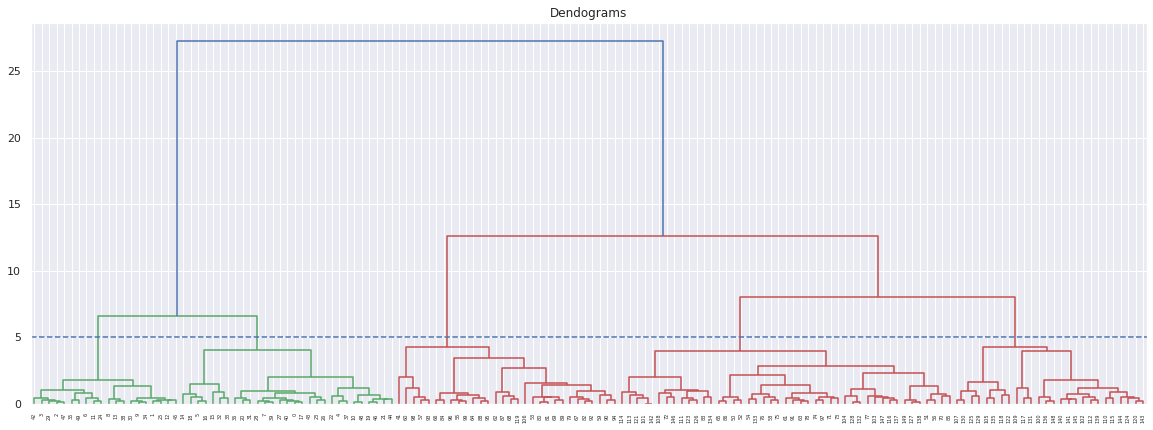

No handles with labels found to put in legend.


***Performing hierarchial clustering***

The davies bouldin score of the clustering is 0.59

The points in each cluster are : 
Counter({0: 101, 1: 49})
The number of cluster centers formed are 2



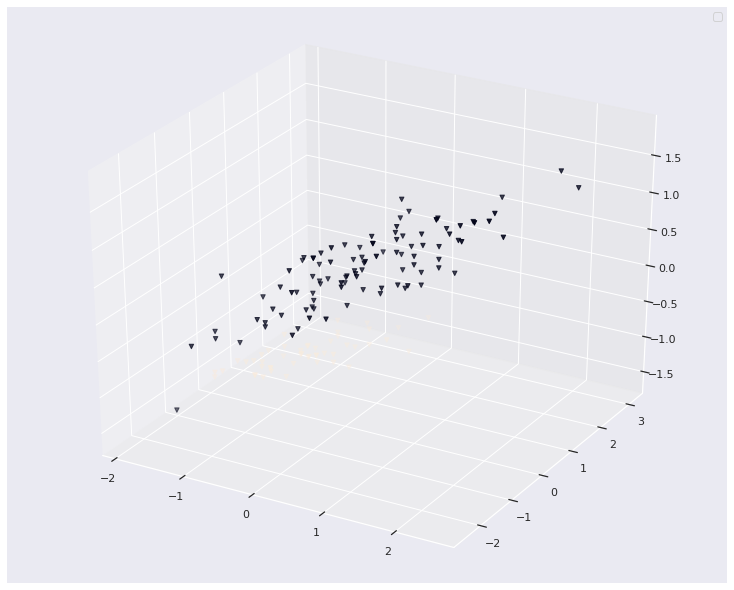

No handles with labels found to put in legend.


***Performing agglomerative clustering***

The davies bouldin score of the clustering is 12.70

The points in each cluster are : 
Counter({1: 83, 0: 47, -1: 20})
The number of cluster centers formed are 3



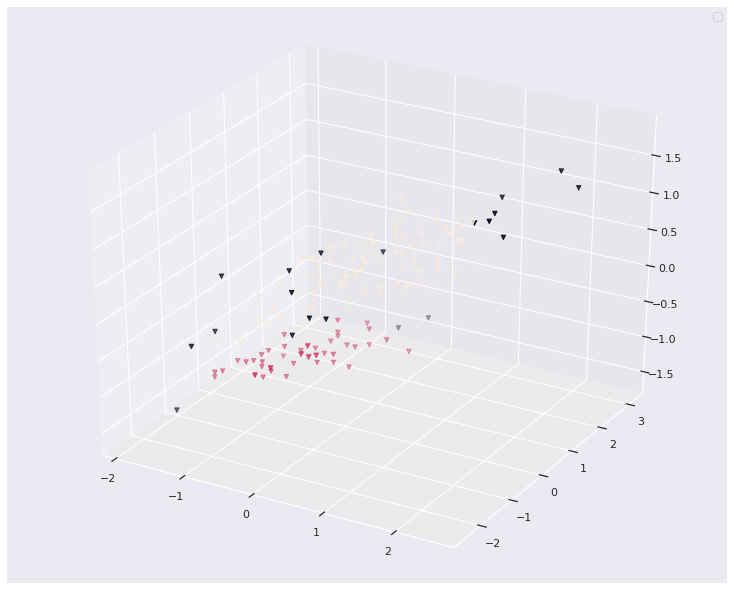

In [39]:

##### $Hierarchial clustering$

#X = df
c = clustering(X)
c.dendogram()

# Let's do some agglomerative clustering from the dendogram it appears ideal cluster size is 6
labels = c.hierarchial_clustering(6)

##### $DBscan  clustering$

labels = c.DBscan_clustering(0.7,10)


### Non-hierarchical:

The maximum silhouette score is 0.58 at the cluster number 2



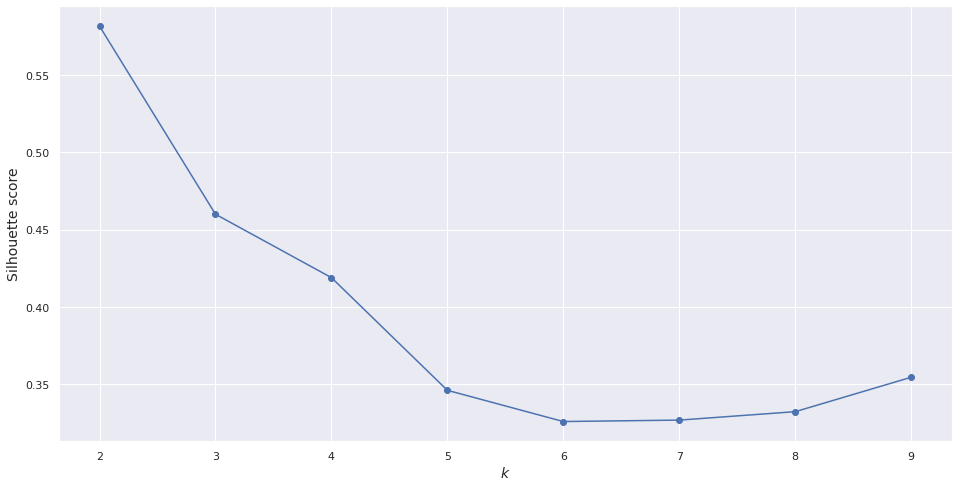

***Performing K-means clustering with 6 clusters***



No handles with labels found to put in legend.


The davies bouldin score of the clustering is 1.06

The points in each cluster are : 
Counter({5: 39, 1: 28, 0: 28, 4: 22, 3: 21, 2: 12})
The k-means inertia is 80.04



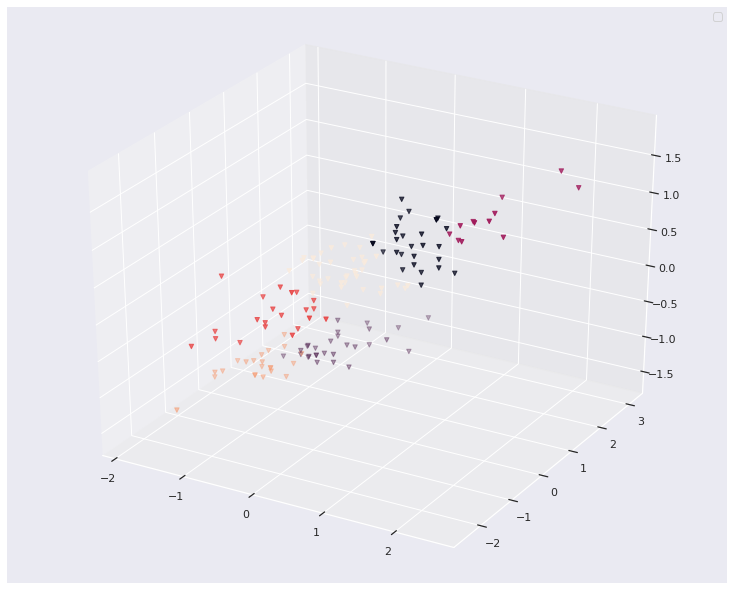

In [40]:

##### $Kmeans clustering$

c.silhouette_scores()

# Since silhouette score is more at value of cluster 6
labels , centers = c.kmeans_clustering(6)

### SVM - Linear classifier

A linear classifier has the form,

$$f(x) = w^T x + b$$ 

**w** is the weight matix and **b** is bias matrix of the **'d'** dimension points

For a non-linearly seperable data the challenge lies in finding the best fit line out of all the points in the **d** dimensional space

<br>

**What's the best fit line?**

![alt text](https://drive.google.com/uc?id=1zc3IRoF1YGgGbnFekfe12p3wGI61D2Ie)

By the definition of classifier we know that:
 $$
f(x) =
  \begin{cases}
    \geq 0       & \quad \text{if } y_i = +1\\
    < 0  & \quad \text{if } y_i = -1
  \end{cases}
$$

The equations formed by the classifier to plot decision boundary is

$$ w^Tx + b \geq 1 \; \text{if } y_i = +1 $$
$$ w^Tx + b \lt -1 \; \text{if } y_i = -1 $$

or equivalently we can write

$$y_i(w^Tx_i + b) \geq 1 \; for \; i = 1.....N $$ 


> ![alt text](https://drive.google.com/uc?id=1vKRa6PmVQJJNA1YfX50j2EWeJjgU10JQ)

### Optimization problem

The final problem becomes solving for the margin  which can be defined as,
$$ Margin = \frac{2}{||w||} $$

Adding for regularization and coefficients to avoid misclassification the optimization problem becomes,

$$ \min_{\substack{
   w \in R^d, \xi_i \in R^+ \\
  }} 
||w||^2 - C \sum_{i}^{N} \xi_i$$

$\xi$ can be defined as slack variable,

- $ 0 \lt \xi \lt 1 $ then the point lies in margin
- $ \xi > 1 $ then point is misclassified


C is a regularization parameter, **C** $\propto \frac{1}{\lambda}$
- small C leads contsraints to be easily ignored -> `linent margin`
- large C makes constraints hard to ignore -> `strict margin`
- C = $\infty$ -> leads to overfitting

The final optmization problem, including loss function becomes,
$$ \min_{\substack{
   w \in R^d\\
  }}
   ||w||^2 + max\sum_{i}^{N}(0 , 1 - y_if(x_i))
$$


### SVM from scratch

#### Pegasus algorithm

- Pegasus algorithm dicusses how to calculate gradients of the hyperplane:

- **INPUT**: S, λ, T

- **INITIALIZE**: Set w1 = 0

- For t = 1, 2, . . . , T
 - Choose $ i_t \in {1, . . . , |S|} $ uniformly at random.
 - Set $ η_t = \frac{1}{λ_t} $
 - If $ y_it (w_t, x_it) < 1, then: $
   - Set $ w_t+1 ← (1 − η_tλ)w_t + η_ty_itx_t $
 - Else
   - Set $ w_t+1 ← (1 − η_tλ)w_t $

- OUTPUT: $ w_T+1 $

#### Pegasus algorithm implementation

**Training a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation.**


In [41]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
def svm_function(x, y, epoch, l_rate):
    ###################################
    ### Pagsus Algorithm###########
    ###################################
    xnew=np.column_stack((x,(np.ones(len(x)))))    
    w=np.zeros(xnew.shape[1])
    for _ in range(epoch):
        i=np.random.randint(len(x))
        if((y[i]*(xnew[i]@w))<1):
            w=w-l_rate*(-2*(1/epoch)* w-y[i]*xnew[i])
        else:
            w=w-l_rate*w*(-2*(1/epoch))
    return w

Randomly generating points to do classification

In [42]:
# Randomly generating data points 
data = [[np.random.rand(), np.random.rand()] for i in range(500)]

for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)

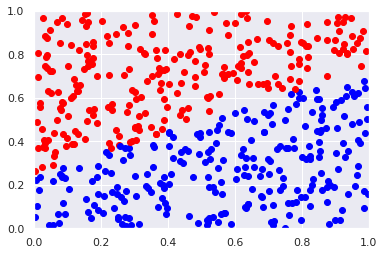

In [43]:
# let's visualise this data
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)

Plot function for SVM classification

In [44]:
import matplotlib.pyplot as plt
def svm_plot(X,y,data,w):

        """
        Plot function to get decision boundary and line point

        """
        #b,w0,w1 = w[0],w[1],w[2]
        slope = (w[0] / -w[1])
        intercept = (w[2] / w[1])

        for x, y, l in data:
                if l == 1: 
                    clr = 'red'
                else: 
                    clr = 'blue'
                plt.scatter(x, y, c=clr)


        xx = X
        y_pred1 = (xx*slope) + intercept + 1/LA.norm(w)
        plt.plot(xx, y_pred1, label = '1st Support Vector',color='green')

        y=(xx*slope) + intercept
        plt.plot(xx, y, label = 'Prediction Boundary',color='black')

        y_pred2 = (xx*slope) + intercept - 1/LA.norm(w)
        plt.plot(xx, y_pred2, label = '2nd Support Vector',color='blue')


        plt.legend()
        plt.show()

[-0.7191769180220734, 0.7786116715791463, -0.5145562226842166]


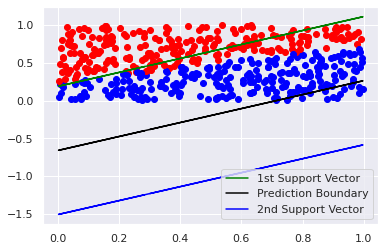

In [45]:
data = np.asarray(data)
X = data[:,:2]
y = data[:,2]

w = svm_function(X,y,len(data), 0.01).tolist()
print(w)
svm_plot(X[:,0],X[:,1],data,w)

*The plots obtained by support vectors are not so accurate as proper kernelization technique is not been used here*

**Now let's check in sklearn package**

#### Sklearn package SVM

Let's plot and use the sklearn package implementation

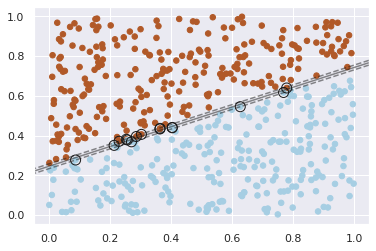

In [46]:
from sklearn import svm

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**The following model trains more better in sklearn package of SVM**

## Kernelization

Our aim is find that function that linearly maps the points in higher dimensional space perfectly

 **$$ K(x,y) = <φ(x),φ(y)> $$**
 
*The K value which follows Mercer's rule with the function φ(x)*


#### Kernel types
The concept used  here is SVM with three types of kernels:

##### 1.  Gaussian Kernels
          Gaussian kernels are used to map to infinite dimensional space to find linearity
**$$ k(x,x') = e^{\frac{-||x - x'||}{2 * \sigma ^2}} $$**

##### 2.  Polynomial Kernels
          Polynomial kernels can be used to find projections of data in higher dimensional space to find linearity
**$$ k(x,x') = (1 + X^T*X')^d $$**

##### 3.  Linear Kernels
          Linear kernels helps in training the data by the simple notion of finding weight
**$$ k(x,x') = (1 + X^T*X') $$**


#### Sparse Random Projections
 It is based on Johnson-Lindenstrauss lemma, which states that if points in a vector space are of sufficiently high dimension, then they may be projected into a suitable lower-dimensional space in a way which approximately preserves the distances between the points.

*$$ k = O({\xi^{-2})*log(\frac{1}{\xi}})) $$*


In [47]:
# All SVM and kernel dependencies
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Math, Latex
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score,classification_report,roc_auc_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

#### Kernelization using Sklearn

In [48]:
#### This class contains all the necessary dependencies to run the SVM kernel and sparse projections
##***** The class is used for classifying in SVC kernel with support vector machines*****

class classification:
  
    def __init__(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.labels = np.unique(y).tolist()

    def confusion_matrix(self):
        #"For plotting matrix plot in kernel"
        cm = confusion_matrix(self.y_test, self.pred, self.labels)
        print(" The confusion matrix is :", '\n' , cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix of the classifier')
        fig.colorbar(cax)
        ax.set_xticklabels([''] + self.labels)
        ax.set_yticklabels([''] + self.labels)
        plt.xlabel('$Predicted$')
        plt.ylabel('$True$')
        plt.show()

    def calc_metrics_class(self):
        #"For getting matrix of all values"
        precision = precision_score(self.pred, self.y_test)
        recall = recall_score(self.pred,self.y_test)
        f1 = f1_score(self.pred,self.y_test)
        accuracy = accuracy_score(self.pred,self.y_test)
        roc = roc_auc_score(self.y_test, self.pred)
        print("The precision for the model is :", precision, '\n', "The recall for the model is : ", recall, '\n'
              , "The f1 score of the model is :", f1, '\n', 
              "The accuracy of the model is : ", accuracy, '\n', "The ROC curve of the model is : ", roc )
        # print classification report 
        print(classification_report(self.y_test,self.pred))

    def f2_scorer(self,y_true, y_pred):
        #"For giving it to model as best criterion param"
        y_true, y_pred, = np.array(y_true), np.array(y_pred)
        return fbeta_score(y_true, y_pred, beta=2, pos_label=0, average='binary')

    def validation_plot_rbf(self,kernel):
        #"For validating and plotting"
        l = len(self.gamma)
        kfold = 5
        self.f2 = make_scorer(self.f2_scorer,greater_is_better=True)

        train_scores, valid_scores = validation_curve(kernel, X_train, y_train,'gamma',
                                                      self.gamma, cv=KFold(n_splits=5,random_state=7), 
                                                      scoring = self.f2,verbose=True)
        train_scores_poly_recall = pd.DataFrame(data=train_scores, 
                                            index=np.arange(0, l), 
                                            columns=np.arange(0,kfold)) 
        valid_scores_poly_recall = pd.DataFrame(data=valid_scores, 
                                            index=np.arange(0, l), 
                                            columns=np.arange(0,kfold))

        plt.plot(self.gamma, train_scores_poly_recall.mean(axis=1), label='training')
        plt.plot(self.gamma, valid_scores_poly_recall.mean(axis=1), label='test')
        plt.xlabel('gamma')
        plt.ylabel('F2 - Score')
        plt.title('SVM with RBF Kernel')
        plt.legend()

    def validation_plot_polynomial(self,kernel):
        #"For validating and plotting"
        l = len(self.degrees)
        kfold = 5
        self.f2 = make_scorer(self.f2_scorer,greater_is_better=True)

        train_scores, valid_scores = validation_curve(kernel, X_train, y_train,'degree',
                                                      self.degrees, cv=KFold(n_splits=5,random_state=7), 
                                                      scoring = self.f2,verbose=True)
        train_scores_poly_recall = pd.DataFrame(data=train_scores, 
                                            index=np.arange(0, l), 
                                            columns=np.arange(0,kfold)) 
        valid_scores_poly_recall = pd.DataFrame(data=valid_scores, 
                                            index=np.arange(0, l), 
                                            columns=np.arange(0,kfold))

        plt.plot(self.degrees, train_scores_poly_recall.mean(axis=1), label='training')
        plt.plot(self.degrees, valid_scores_poly_recall.mean(axis=1), label='test')
        plt.xlabel('degree')
        plt.ylabel('F2 - Score')
        plt.title('SVM with Polynomial Kernel')
        plt.legend()

    def rbf_kernel_svc(self):
         #"RBF Kernel"
        print('Performing modelling for RBF Kernel using SVM')
        self.f2 = make_scorer(self.f2_scorer,greater_is_better=True)
        self.gamma = [1,0.1,0.01,0.001]
        param_grid = {
             'C': [0.1,1, 10,100],
             'gamma': self.gamma,
             'kernel': ['rbf'],
             'max_iter':[100]}
        rbf = SVC()
        grid_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5, n_jobs=-1,scoring=self.f2)  
        grid_model.fit(self.X_train,self.y_train)
        print("Best parameters =", grid_model.best_params_)
        model_clf = rbf.set_params(**grid_model.best_params_)
        model_clf.fit(self.X_train, self.y_train)
        self.pred = model_clf.predict(self.X_test)
        self.calc_metrics_class()
        self.confusion_matrix()
        self.validation_plot_rbf(rbf)
        
        
    def polynomial_kernel_svc(self):
        #"Polynomial Kernel"
        print('Performing modelling for Polynomial Kernel using SVM')
        self.f2 = make_scorer(self.f2_scorer,greater_is_better=True)
        self.degrees = [2,4,6,10,22]
        param_grid = {
             'C': [0.1,1, 10,100],
             'degree': self.degrees,
             'kernel': ['poly'],
             'max_iter':[200]}
        polynomial = SVC()
        grid_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5, n_jobs=-1,scoring=self.f2)  
        grid_model.fit(self.X_train,self.y_train)
        print("Best parameters =", grid_model.best_params_)
        model_clf = polynomial.set_params(**grid_model.best_params_)
        model_clf.fit(self.X_train, self.y_train)
        self.pred = model_clf.predict(self.X_test)
        self.calc_metrics_class()
        self.confusion_matrix()
        self.validation_plot_polynomial(polynomial)
    
    def linear_svc(self,feature_len):
        # Linear kernel
        model = LinearSVC()
        model.fit(self.X_train, self.y_train)
        baseline = metrics.accuracy_score(model.predict(self.X_test), self.y_test)
        accuracies = []
        dims = np.int32(np.linspace(2, feature_len, 20))
       
        # Loop over the projection sizes, k
        for dim in dims:
            # Create random projection
            sp = SparseRandomProjection(n_components = dim)
            X = sp.fit_transform(self.X_train)

            # Train classifier of your choice on the sparse random projection
            model = LinearSVC()
            model.fit(X, self.y_train)

            # Evaluate model and update accuracies
            test = sp.transform(self.X_test)
            accuracies.append(metrics.accuracy_score(model.predict(test), self.y_test))
            
        #Create figure
        plt.figure()
        plt.xlabel(r'Number of dimensions k')
        plt.ylabel(r'Accuracy')
        plt.xlim([1, feature_len])
        plt.ylim([0, 1])
        # Plot baseline and random projection accuracies
        plt.plot(dims, [baseline] * len(accuracies), color = "r",label = 'baseline')
        plt.plot(dims, accuracies,color="b",label = 'accuracy with dimensions')
        plt.legend()
        plt.show()

In [49]:
### The data souce is collected from datasets package and the data is about breast cancer
#Load dataset
cancer = datasets.load_breast_cancer()

##### Let's prepare for higher dimensionality mapping i.e Kernelization
# Split to X and y
X = cancer.data
y = cancer.target

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
                                    X,y, test_size=0.3, random_state=330)

# Convert to df
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head(5)

# Scaling the values
## Fitting the values with standard scaler for bringing all the axis in one scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Performing modelling for RBF Kernel using SVM
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.1s finished


Best parameters = {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100}
The precision for the model is : 0.9436619718309859 
 The recall for the model is :  0.9436619718309859 
 The f1 score of the model is : 0.9436619718309859 
 The accuracy of the model is :  0.9298245614035088 
 The ROC curve of the model is :  0.9253193580085163
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

 The confusion matrix is : 
 [[39  4]
 [ 4 67]]


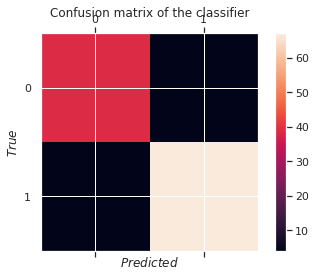

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


Performing modelling for Polynomial Kernel using SVM
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


Best parameters = {'C': 10, 'degree': 2, 'kernel': 'poly', 'max_iter': 200}
The precision for the model is : 1.0 
 The recall for the model is :  0.8987341772151899 
 The f1 score of the model is : 0.9466666666666668 
 The accuracy of the model is :  0.9298245614035088 
 The ROC curve of the model is :  0.9069767441860466
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

 The confusion matrix is : 
 [[35  8]
 [ 0 71]]


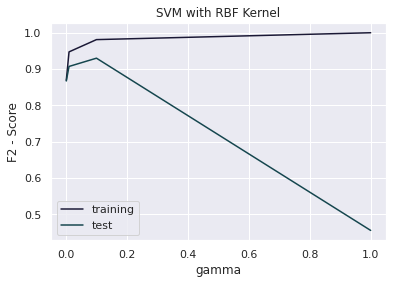

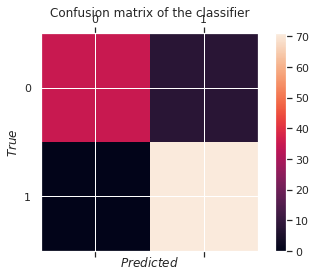

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


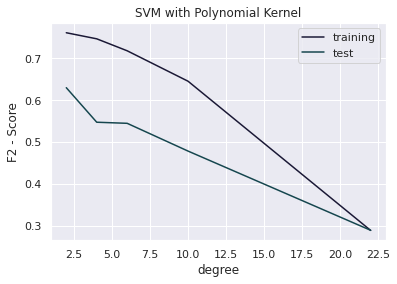

In [50]:
# Training the model
p1 = classification(X,y)
p1.rbf_kernel_svc()
p1.polynomial_kernel_svc()

## Gaussian Mixture Model

- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

- Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

**$$ f(x | \mu,\sum ) = \frac{1}{2\pi\|\sum|} \mathrm{e}^{[\frac{1}{2}(x - \mu)^T \sum^{-1} (x - \mu) ]} $$**

*Thus, this multivariate Gaussian model would have x and μ as vectors of length d, and Σ would be a d x d covariance matrix.*



## Expectation maximisation

- Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters. We typically use EM when the data has missing values, or in other words, when the data is incomplete.

- These missing variables are called latent variables. We consider the target (or cluster number) to be unknown when we’re working on an unsupervised learning problem.

Broadly, the Expectation-Maximization algorithm has two steps:

 - E-step: In this step, the available data is used to estimate (guess) the values of the missing variables

 - M-step: Based on the estimated values generated in the E-step, the complete data is used to update the parameters

 
Expectation-Maximization is the base of many algorithms, including Gaussian Mixture Models. So how does GMM use the concept of EM and how can we apply it for a given set of points? Let’s find out

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *

In [52]:
def gaussian(x,mu,var):
    return np.exp(-(x-mu)**2/(2*var))/(np.sqrt(2*np.pi*np.sqrt(var)))

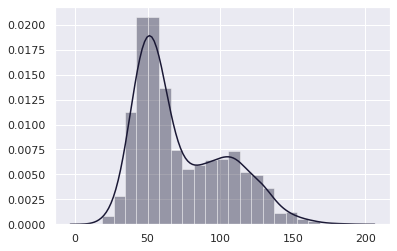

In [53]:
a=np.random.normal(50, 10, 1000)
b=np.random.normal(100, 25, 800)
c=np.append(a,b)

sns.distplot(c)

In [54]:
#Parameters initalised
mu1=30
mu2=50
var1=200
var2=500

loglik=[]

Text(0.5, 0, 'Number of iterations')

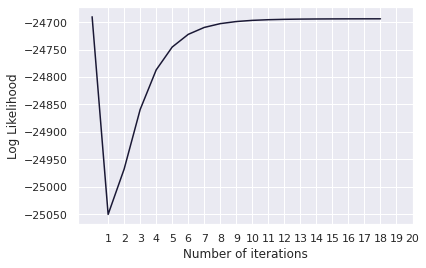

In [55]:
for i in range(20):
    #E Step
    t1=gaussian(c,mu1,var1)
    t2=gaussian(c,mu2,var2)
    summ=t1+t2
    t1=t1/summ
    t2=t2/summ
    
    #M Step
    mu1=np.sum(t1*c)/np.sum(t1)
    mu2=np.sum(t2*c)/np.sum(t2)
    var1=np.sum(t1*(c-mu1)**2)/np.sum(t1)
    var2=np.sum(t2*(c-mu2)**2)/np.sum(t2)
    
    loglik.append(np.sum(np.log(gaussian(c,mu1,var1)*t1+gaussian(c,mu1,var1)*t2)))

plt.plot(loglik[1:])
plt.xticks(np.linspace(1,20,20))
plt.ylabel('Log Likelihood')
plt.xlabel('Number of iterations')

In [56]:
print('Mu1:',round(mu1,2),', Std1:',round(np.sqrt(var1),2),', Mix Percentage:',round(sum(t1)/len(t1),2))
print('Mu2:',round(mu2,2),', Std2:',round(np.sqrt(var2),2),', Mix Percentage:',round(sum(t2)/len(t2),2))

Mu1: 49.5 , Std1: 7.99 , Mix Percentage: 0.39
Mu2: 87.95 , Std2: 30.74 , Mix Percentage: 0.61


In [57]:
pie1=round(sum(t1)/len(t1),2)
pie2=round(sum(t2)/len(t2),2)

In [58]:
rv1 = multivariate_normal(mean = mu1, cov =var1)
rv2 = multivariate_normal(mean = mu2, cov =var2)

Text(0, 0.5, 'PDF')

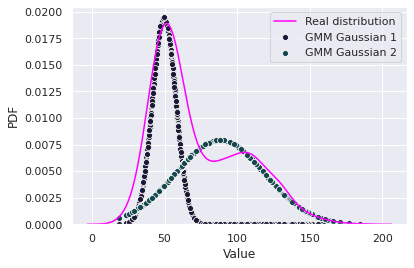

In [59]:
sns.scatterplot(c,rv1.pdf(c)*pie1,label='GMM Gaussian 1')
sns.scatterplot(c,rv2.pdf(c)*pie2,label='GMM Gaussian 2')
sns.kdeplot(c,label='Real distribution',color='magenta')
plt.xlabel('Value')
plt.ylabel('PDF')